In [277]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import scale
from sklearn.utils import shuffle
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import StackingRegressor
from sklearn.preprocessing import MinMaxScaler

Датасет - https://www.kaggle.com/harlfoxem/housesalesprediction

In [278]:
df = pd.read_csv('kc_house_data.csv')
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


id - уникальный идентификатор для каждого проданного дома <br>
date - дата продажи дома <br>
price - Цена каждого проданного дома <br>
bedrooms - Количество спален<br>
bathrooms - Количество ванных комнат<br>
sqft_living - метраж внутренней жилой площади дома<br>
sqft_lot - метраж земельного участка<br>
floors - Количество этажей<br>
waterfront - выходит ли квартира на набережную<br>
view - оценка вида<br>
condition - оценка состояния дома<br>
grade - оценка качества строительства и проектирования<br>
sqft_above - метраж внутренней жилой площади дома над землёй<br>
sqft_basement - метраж внутренней жилой площади дома под землей<br>
yr_built - год постройки дома<br>
yr_renovated - год реновации дома<br>
zipcode - почтовый индекс<br>
lat - широта<br>
long - долгота<br>
sqft_living15 - жилой площадь внутри домов ближайших 15 соседей<br>
sqft_lot15 - площадь земельных участков ближайших 15 соседей<br>

In [279]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [280]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [281]:
def missing_values_table(df):
        miss = df.isnull().sum()
        percent = miss/len(df)*100
        miss_df = pd.concat([miss, percent], axis=1)
        miss_df = miss_df.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        return miss_df

In [282]:
missing_values_table(df)

,Missing Values,% of Total Values
id,0,0.0
date,0,0.0
price,0,0.0
bedrooms,0,0.0
bathrooms,0,0.0
sqft_living,0,0.0
sqft_lot,0,0.0
floors,0,0.0
waterfront,0,0.0
view,0,0.0


In [283]:
df['date'] = pd.to_datetime(df['date'])
df['age'] = df['date'].dt.year - df['yr_built']
df = df.drop(['date', 'yr_built', 'yr_renovated', 'id', 'sqft_basement'], 1)
df.head(3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,zipcode,lat,long,sqft_living15,sqft_lot15,age
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,98178,47.5112,-122.257,1340,5650,59
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,98125,47.7210,-122.319,1690,7639,63
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,98028,47.7379,-122.233,2720,8062,82


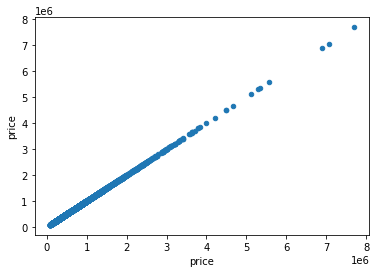

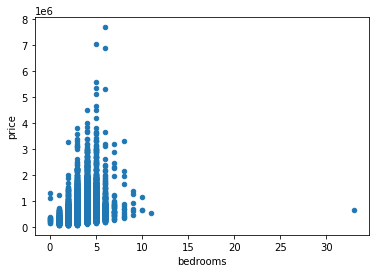

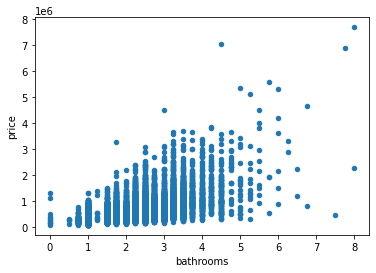

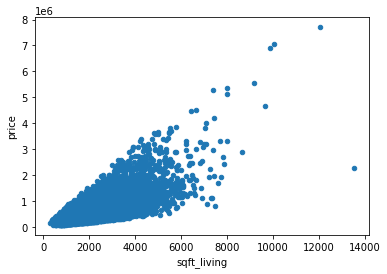

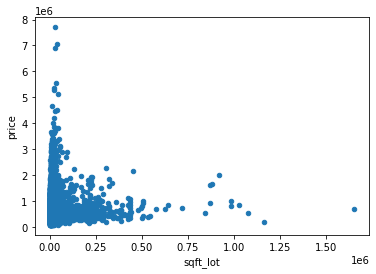

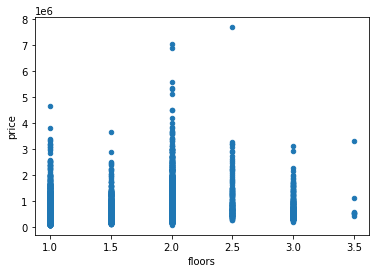

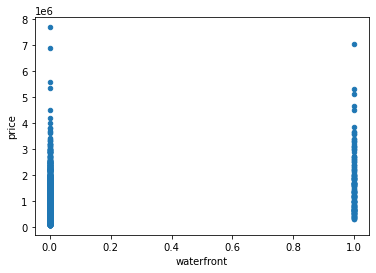

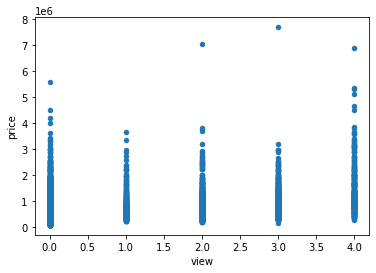

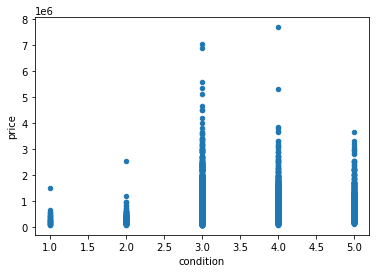

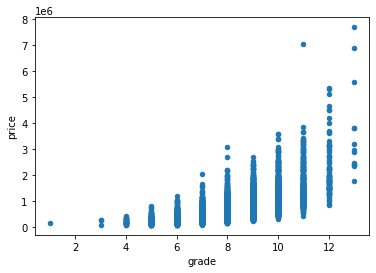

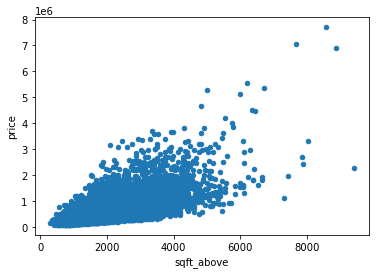

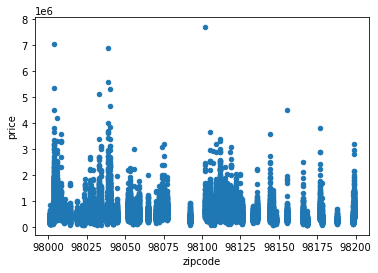

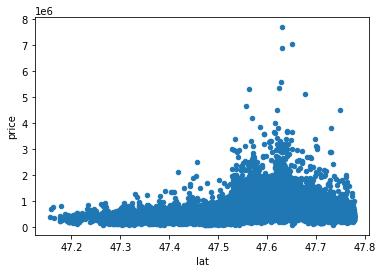

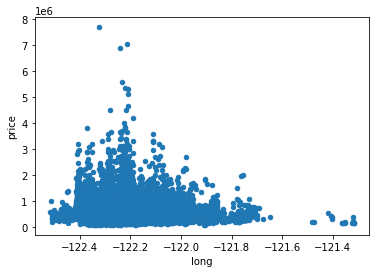

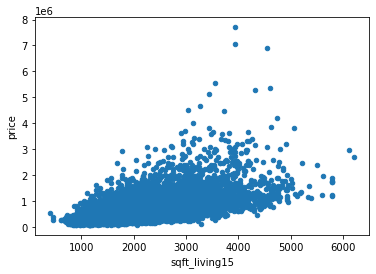

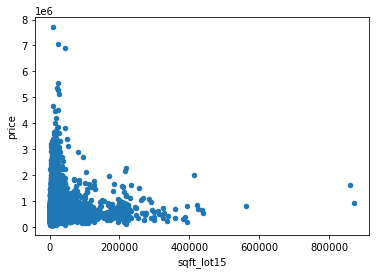

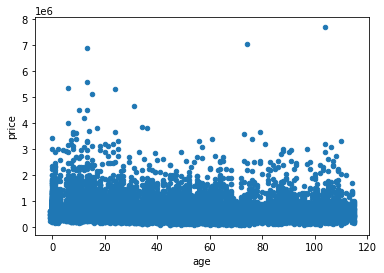

In [284]:
for  feature in (df.columns):
    df.plot(feature, "price", subplots=True, kind="scatter")

In [285]:
df = df.drop(df[df['bedrooms']>30].index)

In [286]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,zipcode,lat,long,sqft_living15,sqft_lot15,age
price,1.000000,0.315445,0.525147,0.702047,0.089664,0.256811,0.266371,0.397299,0.036336,0.667447,0.605591,-0.053209,0.306998,0.021637,0.585404,0.082451,-0.053962
bedrooms,0.315445,1.000000,0.529159,0.591467,0.032807,0.181085,-0.006611,0.081930,0.025478,0.366502,0.490600,-0.157093,-0.010541,0.133882,0.402626,0.030402,-0.159300
bathrooms,0.525147,0.529159,1.000000,0.754663,0.087735,0.500645,0.063742,0.187732,-0.124946,0.664979,0.685339,-0.203858,0.024594,0.223028,0.568628,0.087170,-0.506400
sqft_living,0.702047,0.591467,0.754663,1.000000,0.172822,0.353937,0.103816,0.284606,-0.058704,0.762701,0.876597,-0.199421,0.052552,0.240209,0.756419,0.183280,-0.318476
sqft_lot,0.089664,0.032807,0.087735,0.172822,1.000000,-0.005210,0.021603,0.074707,-0.008935,0.113616,0.183507,-0.129571,-0.085675,0.229516,0.144602,0.718556,-0.052982
floors,0.256811,0.181085,0.500645,0.353937,-0.005210,1.000000,0.023695,0.029432,-0.263706,0.458171,0.523866,-0.059102,0.049655,0.125388,0.279856,-0.011282,-0.489623
waterfront,0.266371,-0.006611,0.063742,0.103816,0.021603,0.023695,1.000000,0.401857,0.016665,0.082773,0.072072,0.030287,-0.014270,-0.041914,0.086461,0.030702,0.026097
view,0.397299,0.081930,0.187732,0.284606,0.074707,0.029432,0.401857,1.000000,0.046031,0.251315,0.167640,0.084834,0.006170,-0.078413,0.280432,0.072571,0.053470
condition,0.036336,0.025478,-0.124946,-0.058704,-0.008935,-0.263706,0.016665,0.046031,1.000000,-0.144632,-0.158136,0.002973,-0.015048,-0.106423,-0.092731,-0.003373,0.360629
grade,0.667447,0.366502,0.664979,0.762701,0.113616,0.458171,0.082773,0.251315,-0.144632,1.000000,0.755919,-0.184852,0.114111,0.198355,0.713198,0.119241,-0.447404


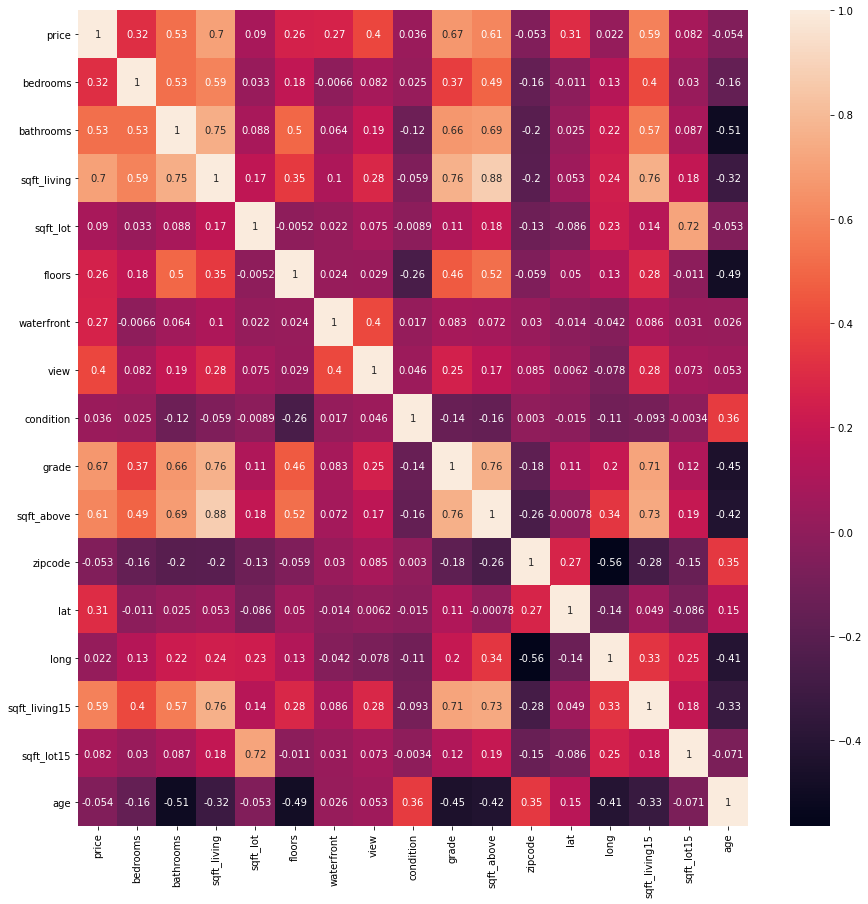

In [287]:
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True)

In [288]:
df_shuffled = shuffle(df, random_state=123)
train = df_shuffled[:int(len(df_shuffled)*0.8)]
test = df_shuffled[len(train):]

In [289]:
train.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,zipcode,lat,long,sqft_living15,sqft_lot15,age
count,1.728900e+04,17289.000000,17289.000000,17289.000000,1.728900e+04,17289.000000,17289.000000,17289.000000,17289.000000,17289.000000,17289.000000,17289.000000,17289.000000,17289.000000,17289.000000,17289.000000,17289.000000
mean,5.387201e+05,3.363699,2.112861,2075.416334,1.495841e+04,1.490977,0.007635,0.234427,3.410087,7.655908,1782.920007,98077.721904,47.559648,-122.214452,1983.469316,12626.115912,43.314130
std,3.687455e+05,0.908628,0.772982,920.851980,4.126799e+04,0.539057,0.087046,0.766718,0.652589,1.177748,826.945127,53.387929,0.138841,0.140100,683.033138,26407.643590,29.300884
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,98001.000000,47.159300,-122.519000,399.000000,651.000000,-1.000000
25%,3.200000e+05,3.000000,1.500000,1420.000000,5.054000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,98033.000000,47.470300,-122.329000,1484.000000,5100.000000,18.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,98065.000000,47.570800,-122.231000,1840.000000,7620.000000,40.000000
75%,6.430000e+05,4.000000,2.500000,2540.000000,1.061500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2200.000000,98117.000000,47.678200,-122.126000,2360.000000,10050.000000,63.000000
max,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,98199.000000,47.777600,-121.316000,6110.000000,858132.000000,115.000000


In [290]:
train.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,zipcode,lat,long,sqft_living15,sqft_lot15,age
16814,150000.0,2,1.00,840,12750,1.0,0,0,3,6,840,98055,47.4840,-122.211,1480,6969,89
3435,279000.0,3,1.50,1280,16738,1.5,0,0,4,5,1280,98038,47.3895,-122.023,1590,16317,82
1727,435000.0,3,2.00,2660,16677,1.0,0,0,3,9,2210,98038,47.3689,-122.055,2660,11355,25
12190,615000.0,3,1.75,2220,7224,1.0,0,2,3,8,2040,98177,47.7740,-122.384,2540,9990,39
13273,609950.0,3,2.25,1760,10350,1.0,0,0,4,7,1330,98033,47.6605,-122.188,2210,11337,36


In [291]:
test.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,zipcode,lat,long,sqft_living15,sqft_lot15,age
count,4.323000e+03,4323.000000,4323.000000,4323.000000,4323.000000,4323.000000,4323.000000,4323.000000,4323.000000,4323.000000,4323.000000,4323.000000,4323.000000,4323.000000,4323.000000,4323.000000,4323.000000
mean,5.455363e+05,3.392551,2.122427,2097.936618,15703.194078,1.507749,0.007171,0.233865,3.406431,7.660884,1810.442748,98078.805459,47.561642,-122.211646,1999.034929,13339.582235,43.327088
std,3.606132e+05,0.905130,0.758897,908.697156,42029.001293,0.543565,0.084387,0.764882,0.642995,1.166482,832.407335,53.973097,0.137456,0.143705,694.689066,30627.751857,29.676590
min,7.800000e+04,0.000000,0.000000,370.000000,635.000000,1.000000,0.000000,0.000000,1.000000,4.000000,370.000000,98001.000000,47.155900,-122.507000,670.000000,750.000000,-1.000000
25%,3.250000e+05,3.000000,1.750000,1440.000000,5001.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1210.000000,98033.000000,47.473000,-122.326000,1490.000000,5110.000000,18.000000
50%,4.550000e+05,3.000000,2.250000,1930.000000,7560.000000,1.500000,0.000000,0.000000,3.000000,7.000000,1580.000000,98065.000000,47.576400,-122.230000,1850.000000,7620.000000,39.000000
75%,6.488760e+05,4.000000,2.500000,2590.000000,10890.000000,2.000000,0.000000,0.000000,4.000000,8.000000,2255.000000,98118.000000,47.677100,-122.122000,2381.000000,10206.500000,63.000000
max,5.300000e+06,10.000000,6.000000,7850.000000,982278.000000,3.500000,1.000000,4.000000,5.000000,13.000000,7850.000000,98199.000000,47.776900,-121.315000,6210.000000,871200.000000,115.000000


In [292]:
test.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,zipcode,lat,long,sqft_living15,sqft_lot15,age
4443,812000.0,3,3.25,3240,8338,2.0,0,0,3,9,3240,98074,47.6321,-122.064,3420,8405,13
8242,675000.0,4,2.50,2040,9225,1.0,0,0,5,8,1610,98052,47.6360,-122.097,1730,9225,46
13287,830000.0,3,3.00,2080,10521,1.5,0,0,3,9,2080,98034,47.6987,-122.228,3730,11840,10
13724,275000.0,2,1.75,930,7080,1.0,0,0,3,6,930,98106,47.5224,-122.360,1100,7680,91
17556,350000.0,4,3.00,2560,5606,2.0,0,0,3,9,2560,98092,47.3274,-122.178,2667,7334,10


In [293]:
def regression(x_train, y_train, x_test, y_test):
    models = {'LIN': LinearRegression().fit(x_train, y_train), 
              'LASSO': Lasso(alpha = 0.3).fit(x_train, y_train), 
              'RIDGE': Ridge(alpha = 0.01).fit(x_train, y_train), 
              'ELASTICNET': ElasticNet().fit(x_train, y_train)}
    for m in models:
        print(m)
        train_pred = models[m].predict(x_train)
        test_pred = models[m].predict(x_test)
        print('Coef: ', models[m].intercept_, models[m].coef_)
        print('--train--')
        print ('Score: ', r2_score(y_train, train_pred))
        print('MSE: ', np.sqrt(mean_squared_error(y_train,train_pred)))
        print('--test--')
        print ('Score: ', r2_score(y_test, test_pred))
        print('MSE: ', np.sqrt(mean_squared_error(y_test,test_pred)))
        print() 
        print()
        #sns.jointplot(x=y_test, y=test_pred, kind='reg', line_kws={"color": "red"})

In [294]:
def scale_data(x_train, y_train, x_test, y_test):
    x_train = (x_train - x_train.min(axis=0)) / (x_train.max(axis=0) - x_train.min(axis=0))
    x_test = (x_test - x_test.min(axis=0)) / (x_test.max(axis=0) - x_test.min(axis=0))
    y_train = (y_train - y_train.min(axis=0)) / (y_train.max(axis=0) - y_train.min(axis=0))
    y_test = (y_test - y_test.min(axis=0)) / (y_test.max(axis=0) - y_test.min(axis=0))
    return x_train, y_train, x_test, y_test

In [295]:
x_train = np.array(train['grade']).reshape((-1, 1))
y_train = np.array(train['price'])
x_test = np.array(test['grade']).reshape((-1, 1))
y_test = np.array(test['price'])
mm=MinMaxScaler()
x_train = mm.fit_transform(x_train)
x_test = mm.transform(x_test)
#x_train, y_train, x_test, y_test = scale_data(x_train, y_train, x_test, y_test)

regression(x_train, y_train, x_test, y_test)

LIN
Coef:  -847002.6917824415 [2498332.65323809]
--train--
Score:  0.44216977424162507
MSE:  275400.77393276413
--test--
Score:  0.4591413602887634
MSE:  265175.4281031472


LASSO
Coef:  -846985.4162854683 [2498301.50708165]
--train--
Score:  0.44216977417290293
MSE:  275400.7739497282
--test--
Score:  0.4591412859689795
MSE:  265175.446322122


RIDGE
Coef:  -846919.4840653136 [2498182.63726005]
--train--
Score:  0.442169772647349
MSE:  275400.77432631113
--test--
Score:  0.459141001030527
MSE:  265175.51617277745


ELASTICNET
Coef:  512530.5653824751 [47217.32051748]
--train--
Score:  0.016555664852225815
MSE:  365669.74305460916
--test--
Score:  0.016736696824365294
MSE:  357541.3769593496




In [296]:
features = ['grade', 'sqft_living', 'sqft_living15']
x_train = np.array(train[features])
y_train = np.array(train['price'])
x_test = np.array(test[features])
y_test = np.array(test['price'])

mm=MinMaxScaler()
x_train = mm.fit_transform(x_train)
x_test = mm.transform(x_test)

#x_train, y_train, x_test, y_test = scale_data(x_train, y_train, x_test, y_test)
regression(x_train, y_train, x_test, y_test)

LIN
Coef:  -433623.58938062727 [1126325.38878076 2405447.79613491   84655.16868717]
--train--
Score:  0.5338961603047738
MSE:  251741.88244002103
--test--
Score:  0.5386324400491999
MSE:  244914.73813756104


LASSO
Coef:  -433618.61203784717 [1126330.39867376 2405361.70814474   84669.02419101]
--train--
Score:  0.5338961601540659
MSE:  251741.8824807196
--test--
Score:  0.5386328240027113
MSE:  244914.63622760744


RIDGE
Coef:  -433655.2556992967 [1126433.04509392 2404709.4284298    84912.69180474]
--train--
Score:  0.5338961533603672
MSE:  251741.88431535204
--test--
Score:  0.5386358095864124
MSE:  244913.8437846606


ELASTICNET
Coef:  494966.6512191528 [46064.41081932 34584.41648732 48814.55475427]
--train--
Score:  0.04292719333360806
MSE:  360733.62288224703
--test--
Score:  0.04425685096757537
MSE:  352502.328135137




In [297]:
models = [('lasso', Lasso()),
        ('ridge', Ridge()),
        ('easticNet',ElasticNet())]
m = StackingRegressor(estimators = models)
m_new = m.fit(x_train, y_train)
pred = m.predict(x_test)
print('train r^2: ', m_new.score(x_train, y_train))
print('test r^2: ', m_new.score(x_test, y_test))

train r^2:  0.06865783279051363
test r^2:  0.05487310968668746
